<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Наивный байесовский классификатор

## Цель работы

Научиться применять модели наивного байесовского классификатора с использованием библиотеки sklearn для решения задач машинного обучения.

## Содержание работы

- Загрузите датасет breast_cancer из библиотеки sklearn.
- Выведите в виде гистограммы распределения непрерывных атрибутов в этом наборе данных.
- Постройте модель наивного байесовского классификатора на первых двух столбцах и оцените ее качество.
- Постройте ту же модель на полном датасете и сравните ее качество с первой.
- Отберите признаки, соответствующие выбранному модельному виду распределения. Постройте модель на выбранных признаках и сравните ее с предыдущей.

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = data.data[:,:2]
y = data.target

In [ ]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

,count
target,
1,357
0,212


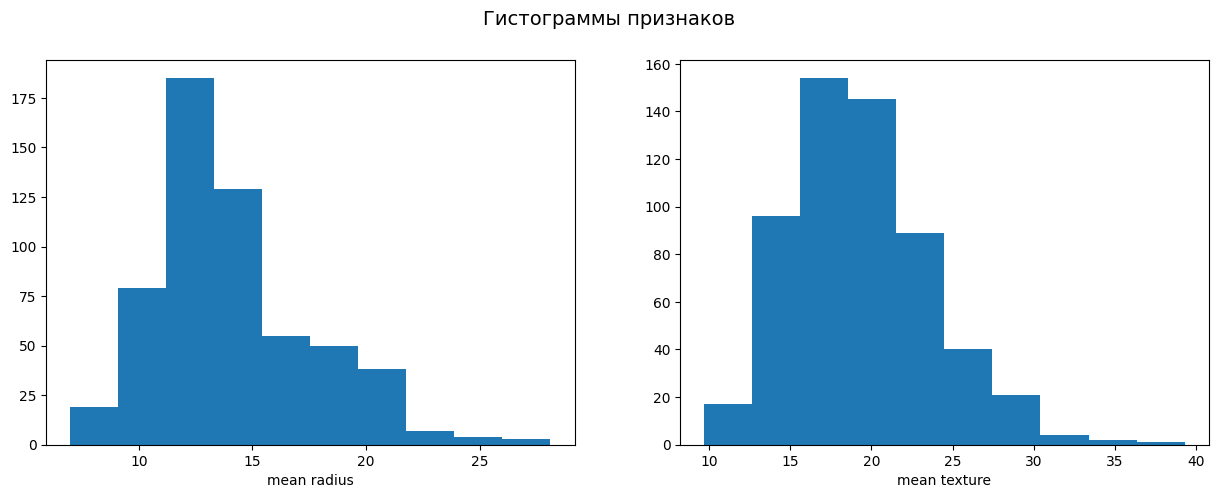

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
gaussian_nb = GaussianNB()

In [ ]:
gaussian_nb.fit(X, y)

GaussianNB()

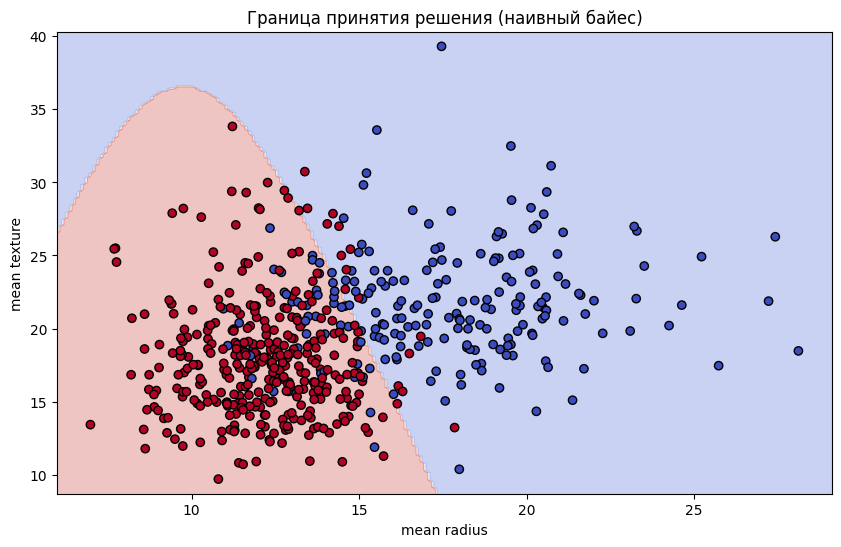

In [ ]:
# Сетка значений для построения поверхности
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Предсказания модели для каждого узла сетки
Z = gaussian_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)  # Области классификации
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')  # Точки
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Граница принятия решения (наивный байес)")
plt.show()


In [ ]:
y_pred = gaussian_nb.predict(X)

In [ ]:
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


In [ ]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [ ]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


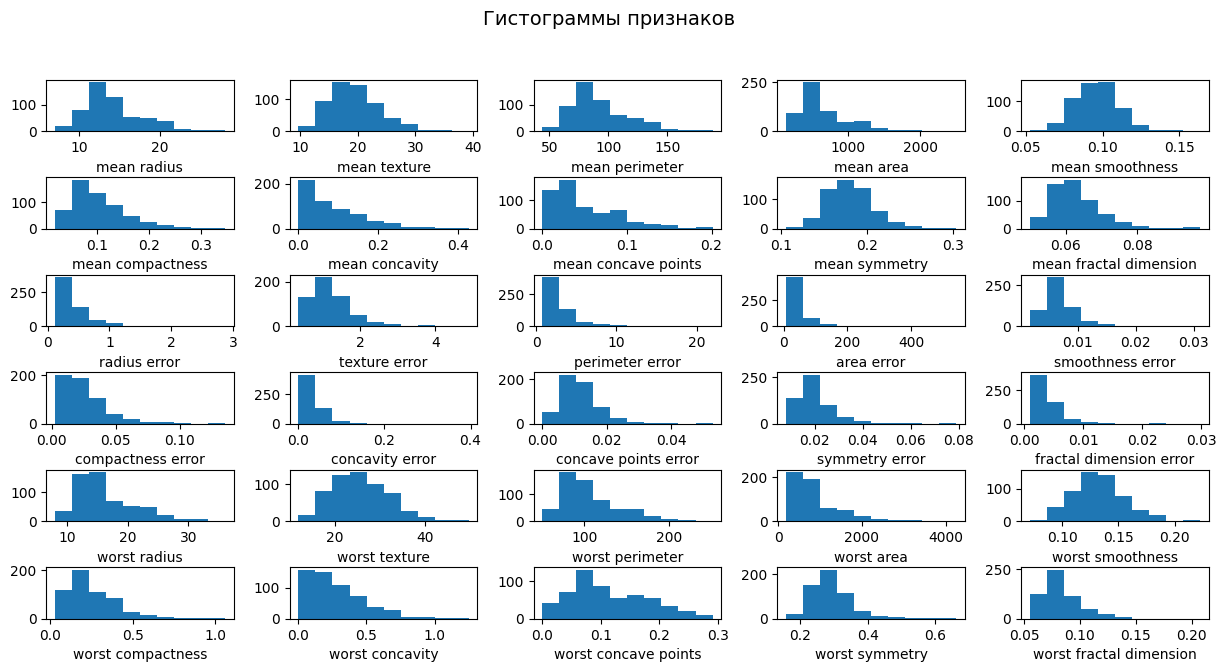

In [ ]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])

    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df = df.drop(['mean concavity','radius error',
              'perimeter error', 'area error',
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area',
              'worst concavity'],
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678,0


In [ ]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


# Для самостоятельного решения
- На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.
- Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.
- Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.


## Мультиномальный Наивный Байес (MultinomialNB)
Описание:
Этот классификатор используется, когда признаки — целые числа (например, количество слов в тексте, количество покупок по категориям, количество событий). Он хорошо работает с частотными признаками.

Проблема с применением:
В нашем датасете признаки — это не целые числа, а непрерывные данные (размеры, текстуры и другие параметры опухолей), так что для применения MultinomialNB, нужно сначала дискретизировать данные.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer

# Дискретизация данных (преобразуем их в интервалы)
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(data.data)

model = MultinomialNB()
model.fit(X_discretized, data.target)

y_pred = model.predict(X_discretized)

accuracy = accuracy_score(data.target, y_pred)
print(f"Точность MultinomialNB: {accuracy:.4f}")


Точность MultinomialNB: 0.8629


## Бернуллиевский Наивный Байес (BernoulliNB)
Описание:
Этот классификатор подходит, когда признаки являются бинарными (например, наличие/отсутствие какого-либо свойства, например, слово в тексте или характеристика объекта).

Проблема с применением:
Данные из датасета о раке груди — не бинарные, а непрерывные. Чтобы использовать BernoulliNB, необходимо преобразовать данные в бинарные.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

# Преобразуем данные в бинарные (например, если значение больше среднего, то 1, иначе 0)
binarizer = Binarizer(threshold=0.5)
X_binary = binarizer.fit_transform(data.data)

model = BernoulliNB()
model.fit(X_binary, data.target)

y_pred = model.predict(X_binary)

accuracy = accuracy_score(data.target, y_pred)
print(f"Точность BernoulliNB: {accuracy:.4f}")


Точность BernoulliNB: 0.8524


## Категориальный Наивный Байес (CategoricalNB)
Описание:
Этот классификатор применяется, когда признаки представляют собой категориальные данные (например, различные группы или классы). В отличие от MultinomialNB, CategoricalNB работает с категориями, а не с целыми числами.

Проблема с применением:
Наши данные представляют собой непрерывные числа, и для применения CategoricalNB нужно дискретизировать данные в категории.

In [ ]:
from sklearn.naive_bayes import CategoricalNB

X_categorical = discretizer.fit_transform(data.data)

model = CategoricalNB()
model.fit(X_categorical, data.target)

y_pred = model.predict(X_categorical)

accuracy = accuracy_score(data.target, y_pred)
print(f"Точность CategoricalNB: {accuracy:.4f}")


Точность CategoricalNB: 0.9455


## Комплементарный Наивный Байес (ComplementNB)
Описание:
Этот классификатор является улучшенной версией мультиномного наивного байеса. Он был разработан для несбалансированных классов и часто показывает более точные результаты, чем стандартный MultinomialNB.

Проблема с применением:
Как и MultinomialNB, этот метод хорошо работает с частотными признаками, но при этом лучше справляется с несбалансированными данными.

In [ ]:
from sklearn.naive_bayes import ComplementNB

# Применяем ComplementNB
model = ComplementNB()
model.fit(X_discretized, data.target)

y_pred = model.predict(X_discretized)

# Оценка точности модели
accuracy = accuracy_score(data.target, y_pred)
print(f"Точность ComplementNB: {accuracy:.4f}")


Точность ComplementNB: 0.8524


## Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [ ]:
# Удалим лишние столбцы (если они есть)
df.drop(columns=['PassengerId'], inplace=True, errors='ignore')

# Преобразуем пол в числовой вид
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Заполним пропуски в Age и Fare средним значением
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


df.fillna(0, inplace=True)  # на всякий заполним все оставшиеся NaN нулями


X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

binarizer = Binarizer(threshold=0.5)
X_train_bin = binarizer.fit_transform(X_train)
X_test_bin = binarizer.transform(X_test)

X_train_disc = X_train.astype(int)
X_test_disc = X_test.astype(int)

models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB()
}

results = {}

for name, model in models.items():
    if name == 'BernoulliNB':
        X_tr, X_te = X_train_bin, X_test_bin
    elif name in ['MultinomialNB', 'ComplementNB']:
        X_tr, X_te = X_train_disc, X_test_disc
    else:
        X_tr, X_te = X_train, X_test

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'F1-score': f1,
        'Confusion Matrix': cm
    }

for name, metrics in results.items():
    print(f"\n{name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])



GaussianNB
Accuracy: 0.6418
F1-score: 0.5000
Confusion Matrix:
[[124  33]
 [ 63  48]]

MultinomialNB
Accuracy: 0.7052
F1-score: 0.5730
Confusion Matrix:
[[136  21]
 [ 58  53]]

BernoulliNB
Accuracy: 0.5933
F1-score: 0.3626
Confusion Matrix:
[[128  29]
 [ 80  31]]

ComplementNB
Accuracy: 0.7090
F1-score: 0.5806
Confusion Matrix:
[[136  21]
 [ 57  54]]


## Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [ ]:
df = pd.read_csv('train.csv')

print(df.head())
print("=====================__________________________========================")
print(df.info())

# Удаляем признаки, не несущие пользы для классификации
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Обрабатываем пропуски
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Преобразуем категориальные переменные в числовые
cat_cols = ['Sex', 'Embarked']
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nF1-score:", f1_score(y_test, y_pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
==